Description: This is a sentiment analysis program that parses tweets fetched from Twitter using python

In [1]:
# import all the necessary libraries
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
from nltk.corpus import twitter_samples

In [2]:
# change the style used to draw the graphs
plt.style.use('fivethirtyeight')

In [3]:
# store a total of 100 tweets to perform sentiment analysis on 
posts = sorted(twitter_samples.strings("negative_tweets.json") + twitter_samples.strings("positive_tweets.json"), key=lambda x: random.random())

# create a dataframe with a column named as tweets
df = pd.DataFrame([tweet for tweet in posts], columns=['Tweets'])

# show the first five rows of the data
df.head()

,Tweets
0,@myungfart ella :( cheer up pls
1,Hi BAM ! @BarsAndMelody \nCan you follow my be...
2,@marie_apayor MAYMAY and @DeniseFronteras If e...
3,Craving for Banana Crumble McFlurry and Fries :(
4,"i'm still finishing my work, dad. : ( https://..."


In [4]:
# clean the tweets
def clean_text(text):
    text = re.sub(r"@\w+", "", text) # removes all @ mentions
    text = re.sub(r"#", "", text) # removes all hashtags
    text = re.sub(r"RT[\s]+", "", text) # removes all retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # removes all hyperlinks
    return text

# apply the function to all the rows
df["Tweet"] = df["Tweets"].apply(clean_text)

# show the new, cleaned dataframe
df.head()

,Tweets,Tweet
0,@myungfart ella :( cheer up pls,ella :( cheer up pls
1,Hi BAM ! @BarsAndMelody \nCan you follow my be...,Hi BAM ! \nCan you follow my bestfriend ? \n...
2,@marie_apayor MAYMAY and @DeniseFronteras If e...,"MAYMAY and If ever you make plans, DO IT IN ..."
3,Craving for Banana Crumble McFlurry and Fries :(,Craving for Banana Crumble McFlurry and Fries :(
4,"i'm still finishing my work, dad. : ( https://...","i'm still finishing my work, dad. : ("


In [5]:
# get the subjectivity: how subjective the `text` is
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# get the polarity: how positive or negative the `text` is
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# create two new columns in our dataframe to store subjectivity and polarity
df['Subjectivity'] = df['Tweets'].apply(get_subjectivity)
df['Polarity'] = df['Tweets'].apply(get_polarity)

# show the dataframe
df.head()

,Tweets,Tweet,Subjectivity,Polarity
0,@myungfart ella :( cheer up pls,ella :( cheer up pls,1.0,-0.75
1,Hi BAM ! @BarsAndMelody \nCan you follow my be...,Hi BAM ! \nCan you follow my bestfriend ? \n...,0.8,0.50
2,@marie_apayor MAYMAY and @DeniseFronteras If e...,"MAYMAY and If ever you make plans, DO IT IN ...",1.0,-1.00
3,Craving for Banana Crumble McFlurry and Fries :(,Craving for Banana Crumble McFlurry and Fries :(,1.0,-0.75
4,"i'm still finishing my work, dad. : ( https://...","i'm still finishing my work, dad. : (",1.0,-0.75


To see how well the sentiments are distributed, we plot the distribution of words. This can be done using a WordCloud. The more times a specific word appears, the bolder and more prominent it appears in the wordcloud.

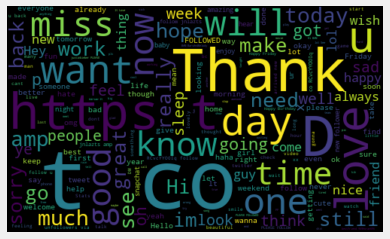

In [6]:
# plot a wordcloud
all_words = ' '.join(tweets for tweets in df['Tweets'])
word_cloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
# create a function to compute the negative, neutral and positive analysis
def get_analysis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

# classify each tweet as either positive, negative or neutral 
df['Analysis'] = df['Polarity'].apply(get_analysis)

# show the dataframe
df.head()

,Tweets,Tweet,Subjectivity,Polarity,Analysis
0,@myungfart ella :( cheer up pls,ella :( cheer up pls,1.0,-0.75,negative
1,Hi BAM ! @BarsAndMelody \nCan you follow my be...,Hi BAM ! \nCan you follow my bestfriend ? \n...,0.8,0.50,positive
2,@marie_apayor MAYMAY and @DeniseFronteras If e...,"MAYMAY and If ever you make plans, DO IT IN ...",1.0,-1.00,negative
3,Craving for Banana Crumble McFlurry and Fries :(,Craving for Banana Crumble McFlurry and Fries :(,1.0,-0.75,negative
4,"i'm still finishing my work, dad. : ( https://...","i'm still finishing my work, dad. : (",1.0,-0.75,negative


In [8]:
sorted_df = df.sort_values(by=['Polarity'])

In [9]:
%%script echo
# print all of the positive tweets
for index, row in enumerate(range(sorted_df.shape[0]), 1):
    if sorted_df['Analysis'][row] == 'positive':
        print(index, sorted_df['Tweets'][row])

In [10]:
%%script echo 
# print all the negative tweets
for index, row in enumerate(range(sorted_df.shape[0]), 1):
    if sorted_df['Analysis'][row] == 'negative':
        print(index, sorted_df['Tweets'][row])

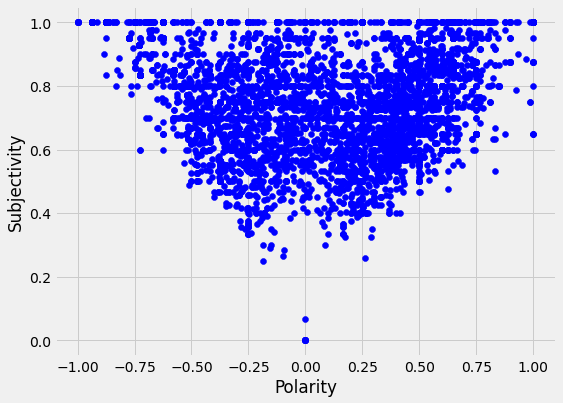

In [11]:
# plot the polarity and subjectivity
plt.figure(figsize=(8, 6))
for row in range(df.shape[0]):
    plt.scatter(df['Polarity'][row], df['Subjectivity'][row], color='Blue')

plt.title = 'Sentiment Analysis'
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [12]:
# get the percentage of positive tweets
positive_tweets = df[df.Analysis == 'positive']
positive_tweets = positive_tweets['Tweets']

positive_percentage = round(positive_tweets.shape[0] / df.shape[0] * 100, 2)
print('Positive tweets percentage:', positive_percentage, '%')

# get the percentage of negative tweets
negative_tweets = df[df.Analysis == 'negative']
negative_tweets = negative_tweets['Tweets']

negative_percentage = round(negative_tweets.shape[0] / df.shape[0] * 100, 2)
print('Negative tweets percentage:', negative_percentage, '%')


Positive tweets percentage: 51.58 %
Negative tweets percentage: 48.03 %


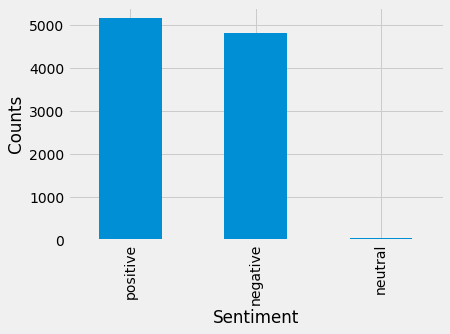

In [13]:
# show the value counts
df['Analysis'].value_counts()

# plot and visualize the counts
plt.title = 'Sentiment Analysis'
plt.xlabel('Sentiment')
plt.ylabel('Counts')

df['Analysis'].value_counts().plot(kind='bar')
plt.show()